<a href="https://colab.research.google.com/github/Pradeep1023/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# dropping Id,bname host_name and last review as they are not significant

In [ ]:
df.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [ ]:
# dealing with null values in column name
df['reviews_per_month'].fillna(0, inplace=True)
df['name'].fillna('nan',inplace=True)

In [ ]:
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

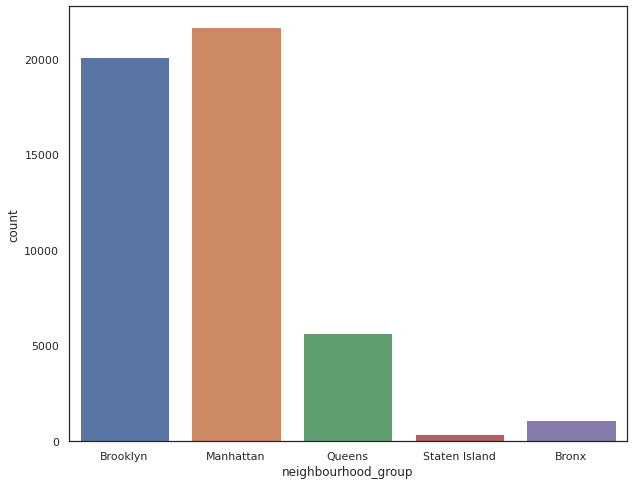

In [ ]:
sns.countplot(df['neighbourhood_group'])

In [ ]:
df['neighbourhood'].value_counts(ascending=False).head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

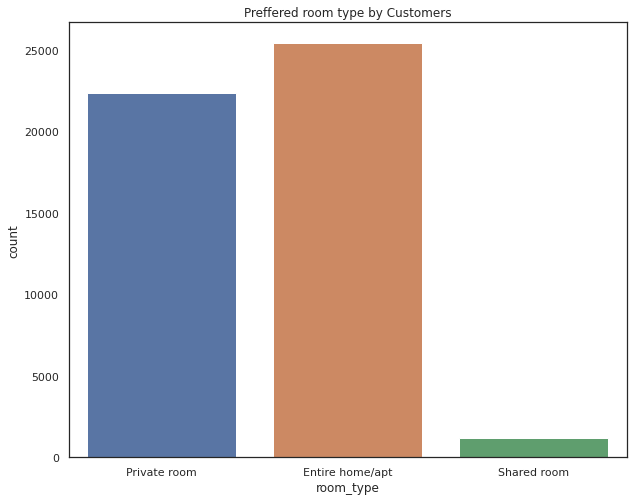

In [ ]:
plt.title('Preffered room type by Customers')
sns.countplot(df['room_type'])

In [ ]:
# most people prefers entire home or apartment room type

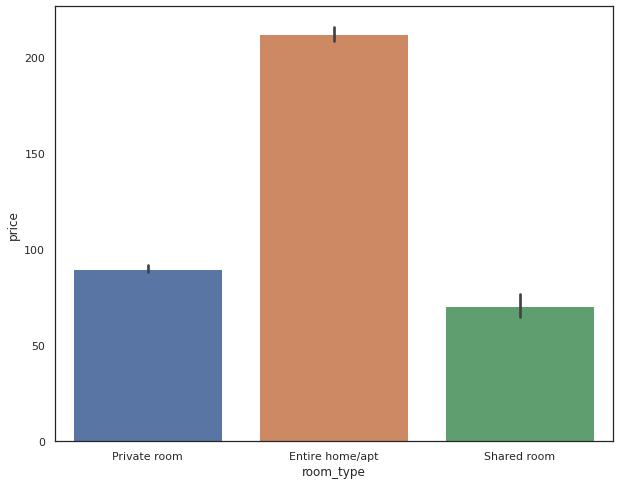

In [ ]:
sns.barplot(x=df['room_type'], y=df['price'])

In [ ]:
# Entire home or apt room type are most expensive

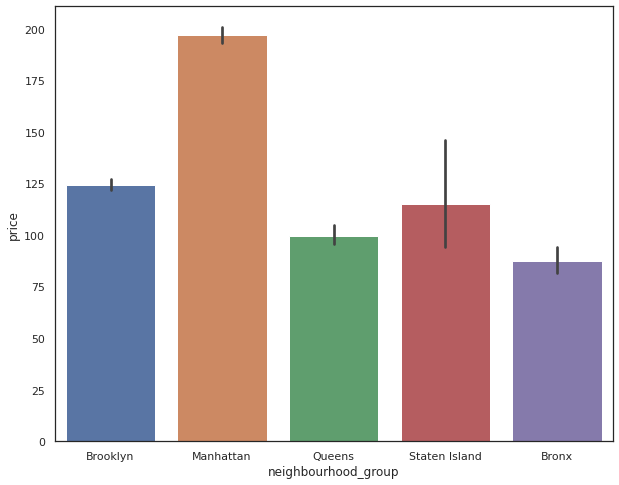

In [ ]:
sns.barplot(y=df['price'], x=df['neighbourhood_group'])

In [ ]:
# manhattan is most expensive neighbourhood group followed by brooklyn

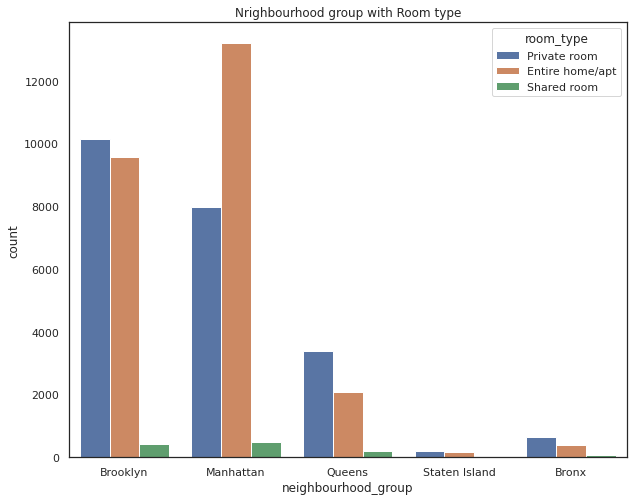

In [ ]:
plt.title('Nrighbourhood group with Room type')
sns.countplot(hue=df['room_type'],x=df['neighbourhood_group'])

In [ ]:
# In manhattan people mostly prefers entire home while brooklyn people prefer private room

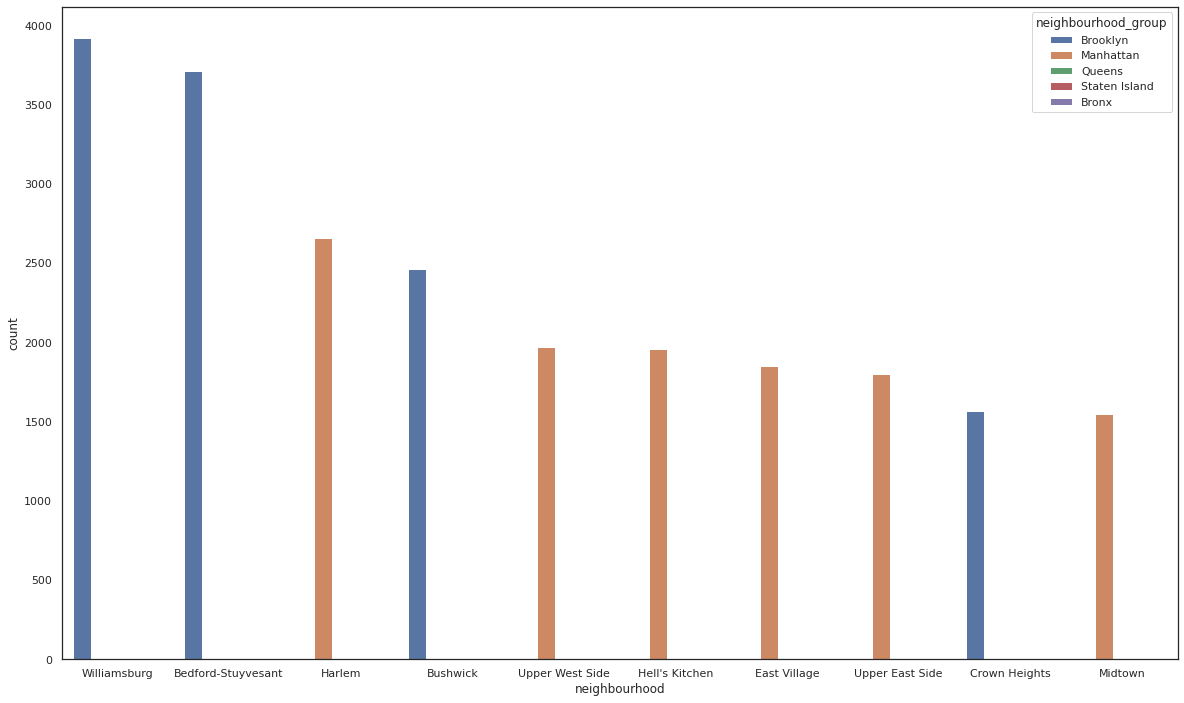

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x=df['neighbourhood'],order = df.neighbourhood.value_counts(ascending=False).iloc[:10].index, hue=df['neighbourhood_group'])

In [ ]:
# williamsburg, bedford-stuyvesant and harlem are the most listed neighbourhood, brooklyn and manhattan has the mojority share of listings

In [ ]:
top_host = df['host_id'].value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
df['calculated_host_listings_count'].max()

327

In [ ]:
df_hostid = pd.DataFrame(top_host)
df_hostid.reset_index(inplace=True)
df_hostid.rename(columns={'index':'host_id','host_id':'Listings_count'},inplace=True)

In [ ]:
df_hostid

,host_id,Listings_count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

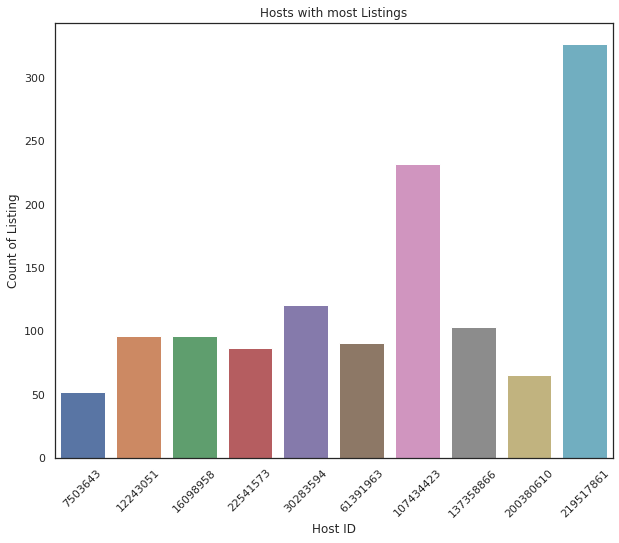

In [ ]:
ax = sns.barplot(x ='host_id', y = 'Listings_count', data=df_hostid)
ax.set_title('Hosts with most Listings')
ax.set_xlabel('Host ID')
ax.set_ylabel('Count of Listing')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Text(0.5, 1.0, 'Availabilty in neighbourhood group')

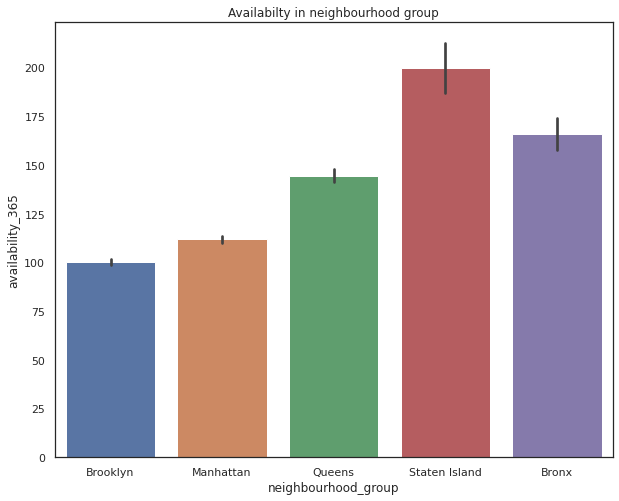

In [ ]:
ax = sns.barplot(x=df['neighbourhood_group'], y=df['availability_365'])
ax.set_title('Availabilty in neighbourhood group')

Text(0.5, 1.0, 'Room type Availability')

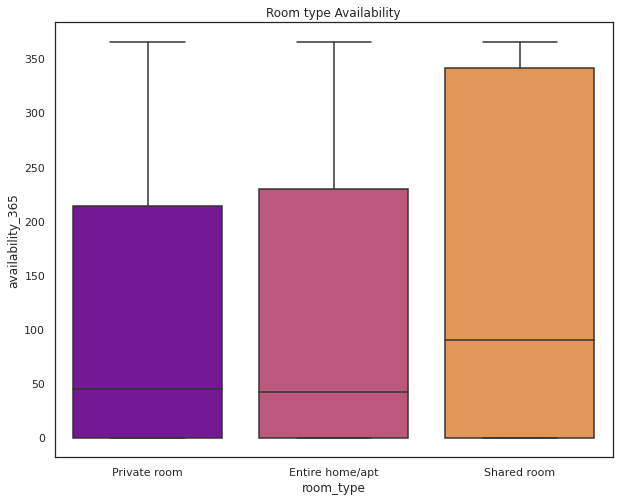

In [ ]:
ax=sns.boxplot(x=df['room_type'],y=df['availability_365'],palette='plasma')
ax.set_title('Room type Availability')

Text(0.5, 1.0, 'Room type Availability in Neighbourhood group')

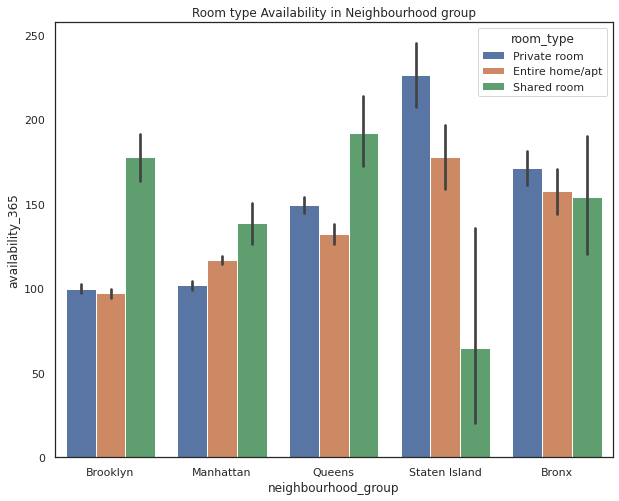

In [ ]:
ax=sns.barplot(x=df['neighbourhood_group'], y=df['availability_365'], hue=df['room_type'])
ax.set_title('Room type Availability in Neighbourhood group')

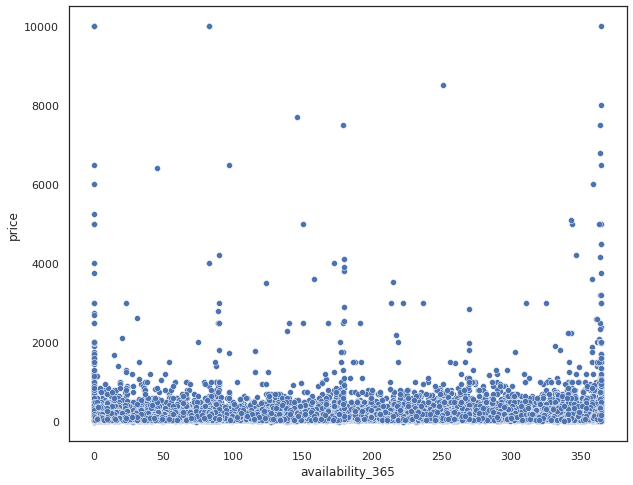

In [ ]:
sns.scatterplot(x=df['availability_365'],y=df['price'])

In [ ]:
# very few rooms are available for price above  2000$ 

Text(0.5, 1.0, 'Availability in Neighbouhood')

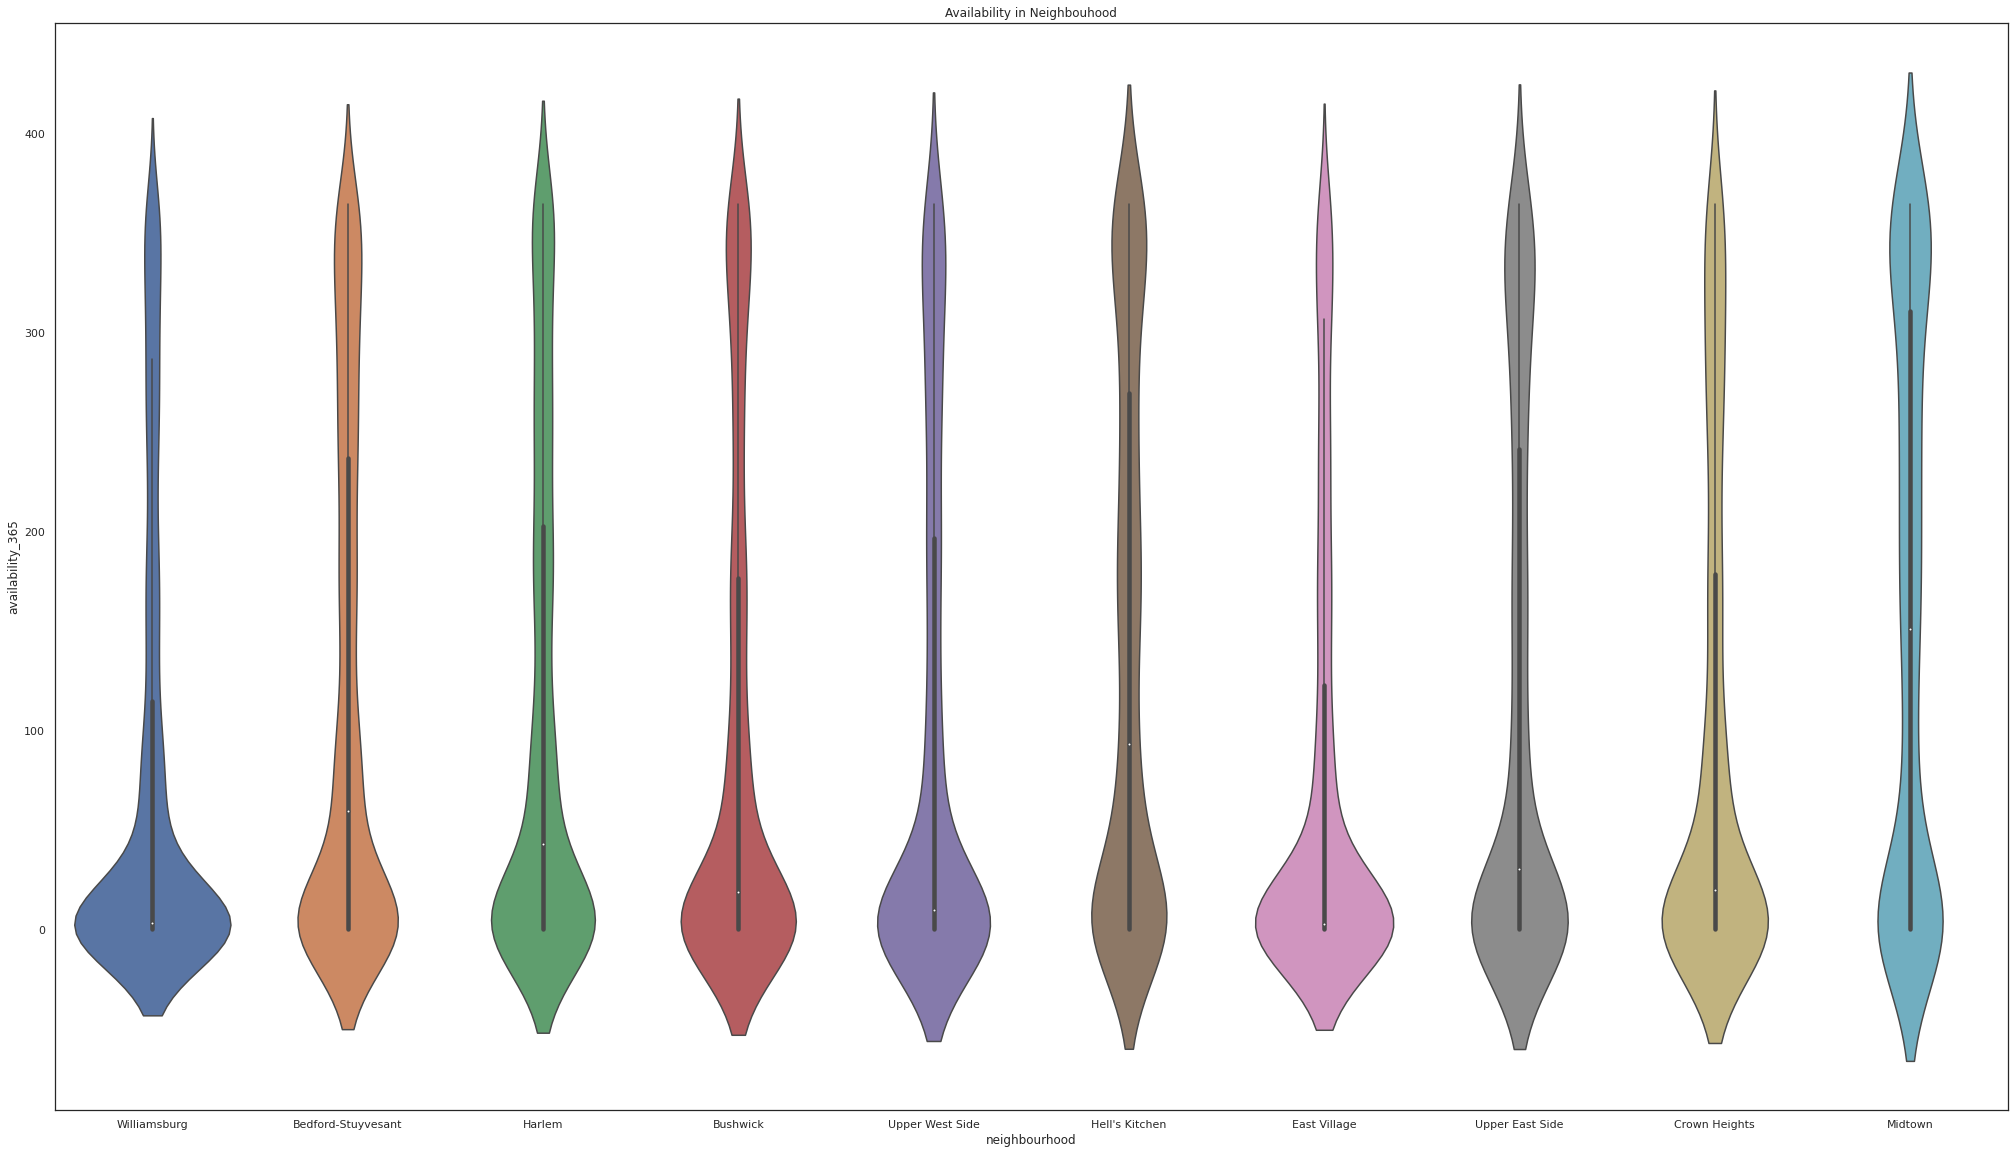

In [ ]:
plt.figure(figsize=(35,20))
ax=sns.violinplot(x=df['neighbourhood'],order = df.neighbourhood.value_counts(ascending=False).iloc[:10].index, y=df['availability_365'])
ax.set_title('Availability in Neighbouhood')

In [ ]:
# we can see most rooms are available in neighbourhood Midtown, Hell's Kitchen and upper east side

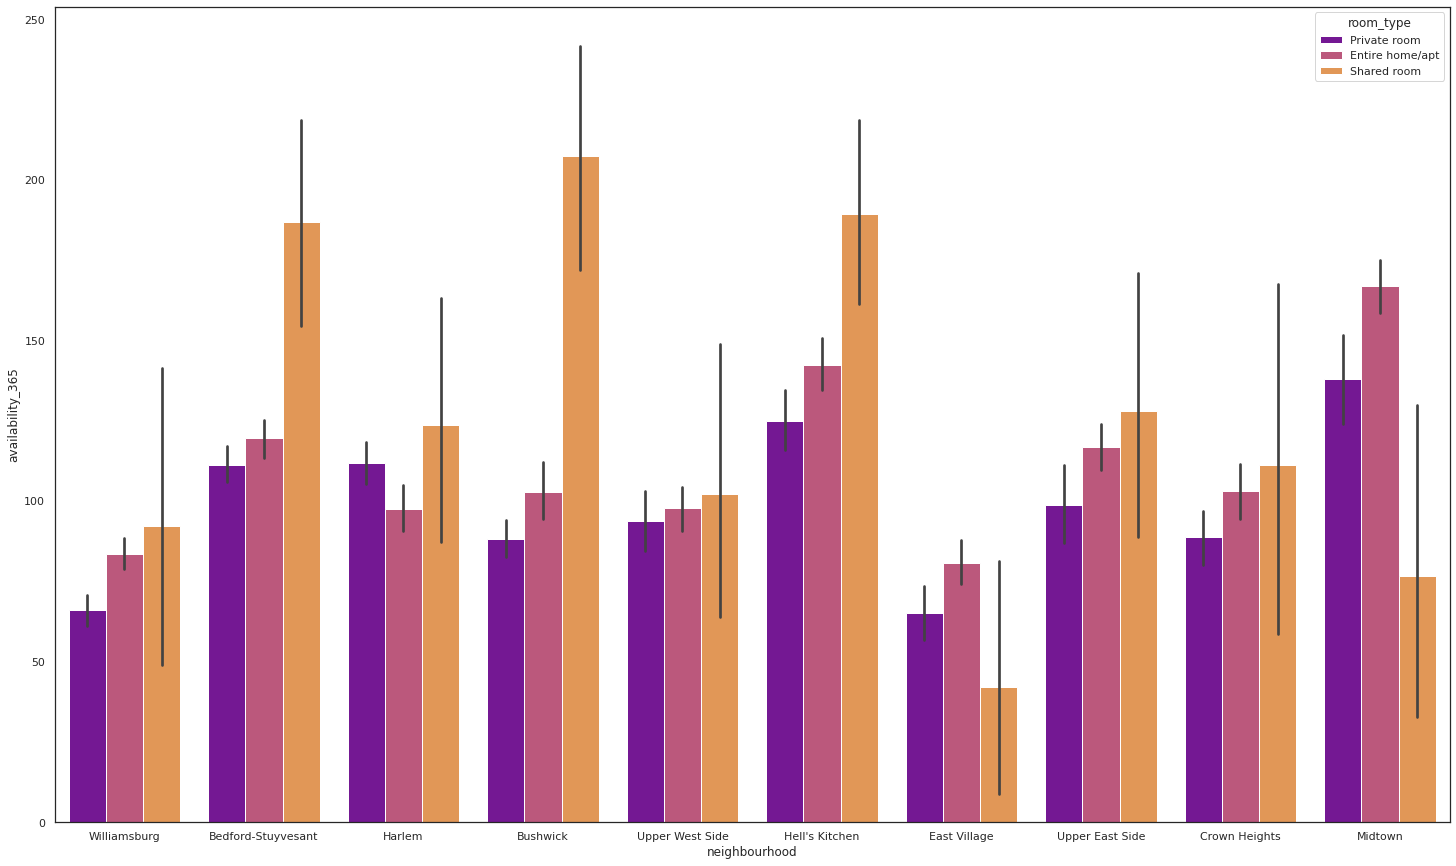

In [ ]:
plt.figure(figsize=(25,15))
sns.barplot(x=df['neighbourhood'],order = df.neighbourhood.value_counts(ascending=False).iloc[:10].index, y=df['availability_365'],hue=df['room_type'],palette='plasma')

In [ ]:
# So in most of the neighbourhoods more shared rooms are available but in East village and midtown entire homes availability count is more.

Text(0.5, 1.0, 'Map of Neighbourhood group')

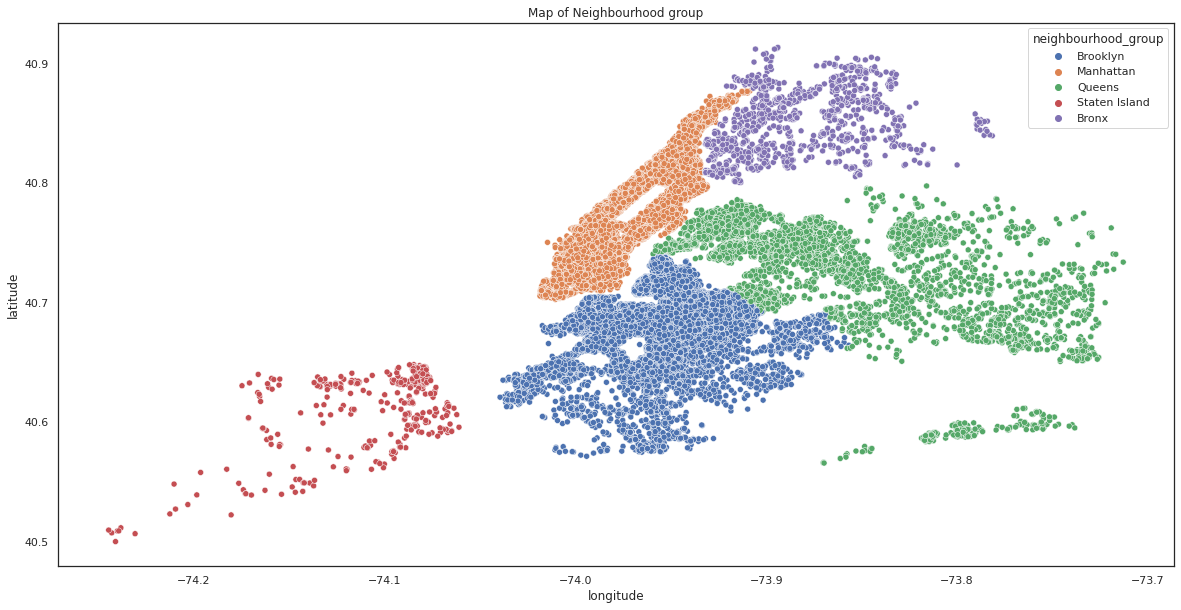

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.scatterplot(df.longitude,df.latitude,df.neighbourhood_group)
ax.set_title('Map of Neighbourhood group')

Text(0.5, 1.0, 'Map of Neighbourhood')

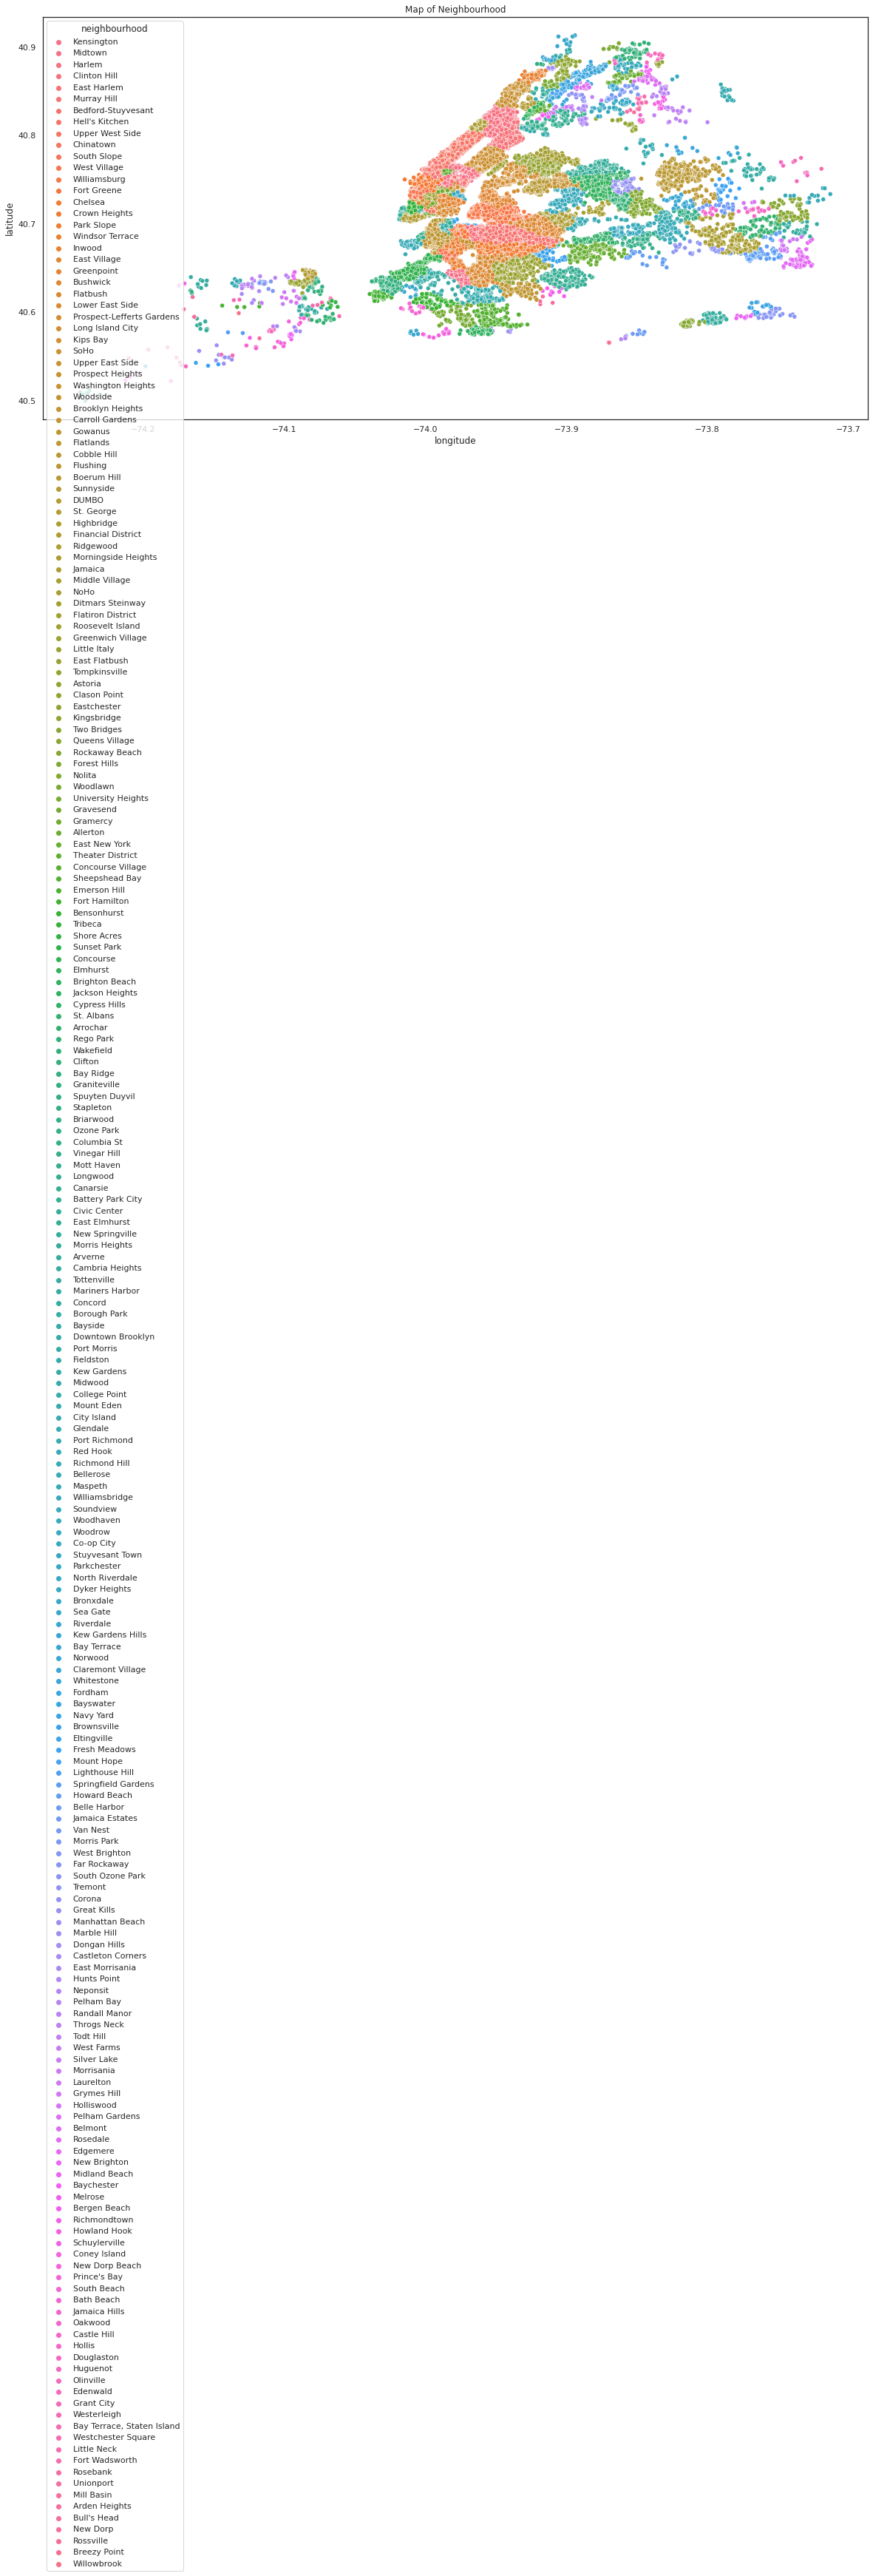

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.scatterplot(df.longitude,df.latitude,df.neighbourhood)
ax.set_title('Map of Neighbourhood')

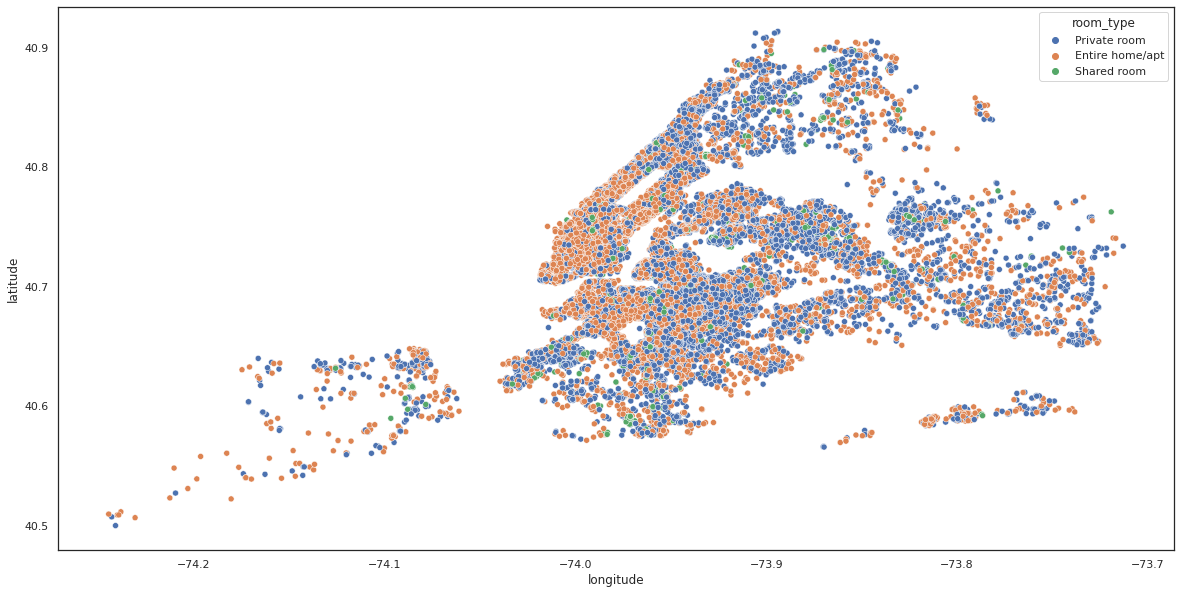

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(df.longitude,df.latitude,df.room_type)

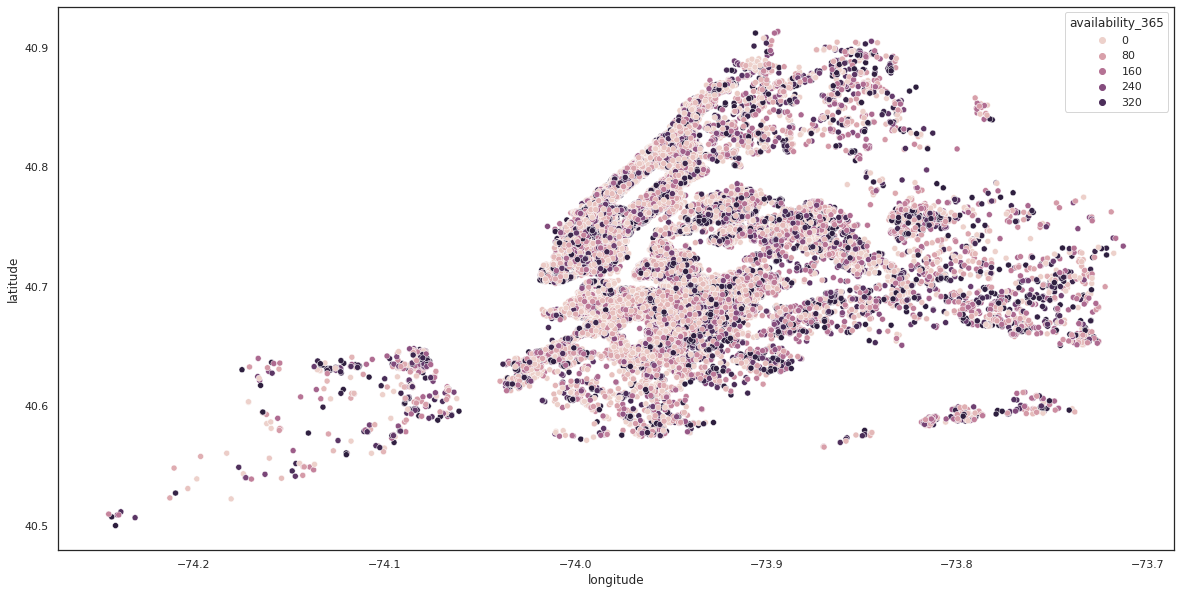

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(df.longitude,df.latitude,df.availability_365)

In [ ]:
nam = []
for i in df.name:
  nam.append(i)
def split_name(i):
  spl = str(i).split()
  return spl

names_for_count = []
for x in nam:
  for word in split_name(x):
    word=word.lower()
    names_for_count.append(word)

In [ ]:
from collections import Counter
top25_words = Counter(names_for_count).most_common()

In [ ]:
top25_words = top25_words[0:25]
words = pd.DataFrame(top25_words)

In [ ]:
words.rename(columns={0:'word',1:'count'},inplace=True)

In [ ]:
words

,word,count
0,in,16733
1,room,9389
2,bedroom,7231
3,private,6985
4,apartment,6113
5,cozy,4634
6,the,3869
7,to,3827
8,studio,3772
9,brooklyn,3629


[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

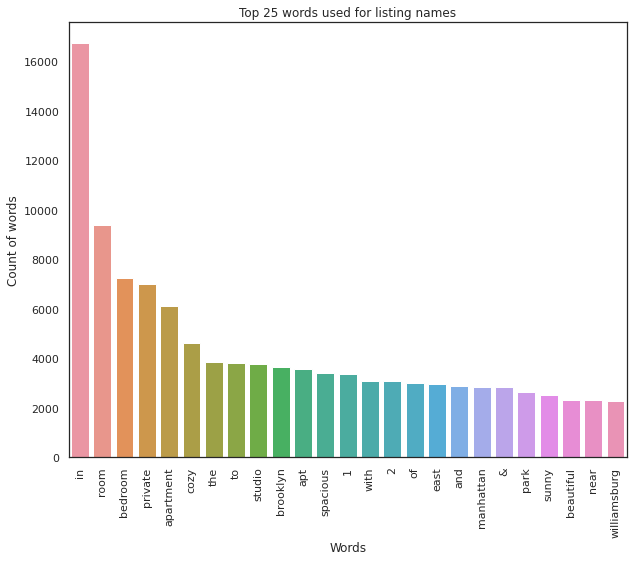

In [ ]:
ax = sns.barplot(x = words['word'], y = words['count'])
ax.set_title('Top 25 words used for listing names')
ax.set_xlabel('Words')
ax.set_ylabel('Count of words')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [ ]:
# top words used for listing names are in, room, bedroom, private and apartment

In [ ]:
# top 10 most revied listings
top_reviewd = df.nlargest(10,'number_of_reviews')


In [ ]:
top_reviewd.price.mean()

65.4

In [ ]:
# Average price per night of top reviewd places is 65$